# OLA 3

Focus on trying out unsupervised machine learning algorithms.
We'll try KMeans on our house data set fra OLA2 (not expecting much since we are operating with labelled data).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950','3000','3460']
dataframes = []

for city in cities:
    filename = f'./house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    df['City'] = city
    dataframes.append(df)

housing = pd.concat(dataframes, ignore_index=True)
housing["Type"].unique()

housing = housing.rename(columns={'X': 'longitude'})
housing = housing.rename(columns={'Y': 'latitude'})
housing = housing.drop(columns=["Url"])
housing.head()

,Address,longitude,latitude,Price,Type,Size,Squaremeter price,Energy class,City
0,"Nørgaardsvej 27, 2. th",55.770647,12.508193,1595000,Ejerlejlighed,44,36250,E,2800
1,Gammelmosevej 218,55.756103,12.480264,4495000,Rækkehus,113,39778,C,2800
2,Danmarksvej 43A,55.794678,12.517936,7695000,Villa,182,42280,D,2800
3,Stengårdsvænge 103,55.759154,12.482144,5295000,Rækkehus,102,51911,C,2800
4,Buddingevej 110,55.758719,12.494712,8750000,Villa,188,46542,D,2800


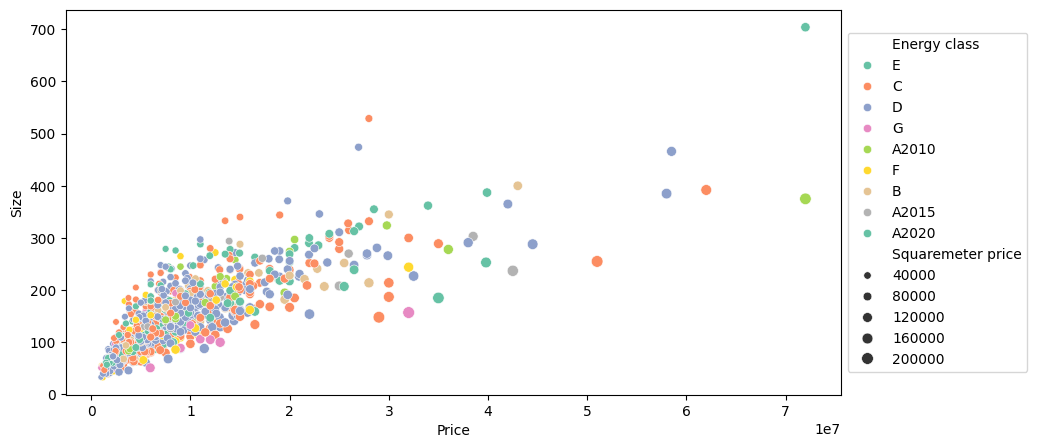

In [2]:
plt.figure(1 , figsize = (10 , 5))

houses_plot = sns.scatterplot(
    data=housing,
    x="Price",
    y="Size",
    hue="Energy class",
    size="Squaremeter price",
    palette="Set2"
);

houses_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

We are well aware that our data set displays a linear tendency, which makes sense in our case with the houses. The data isn't that random and we've got labeled data after all. But we'll continue any way.

In [3]:
housing.drop(columns=['Address', 'Energy class', 'Type'], inplace=True)

In [4]:
from sklearn import preprocessing
X = housing.drop(["Price","Size"],axis=1)
print(X.head())
X_norm = preprocessing.normalize(X)

   longitude   latitude  Squaremeter price  City
0  55.770647  12.508193              36250  2800
1  55.756103  12.480264              39778  2800
2  55.794678  12.517936              42280  2800
3  55.759154  12.482144              51911  2800
4  55.758719  12.494712              46542  2800


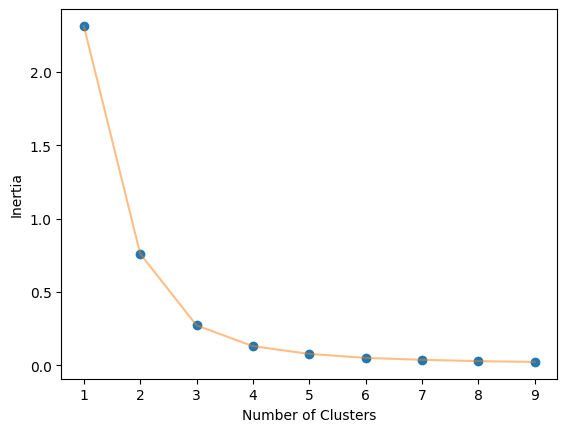

In [5]:
import numpy as np
from sklearn.cluster import KMeans

def elbow_plot(data,clusters):
    inertia = []
    for n in range(1, clusters):
        algorithm = KMeans(
            n_clusters=n,
            init="k-means++",
            random_state=125,
        )
        algorithm.fit(data)
        inertia.append(algorithm.inertia_)
    # Plot
    plt.plot(np.arange(1 , clusters) , inertia , 'o')
    plt.plot(np.arange(1 , clusters) , inertia , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
    plt.show();

elbow_plot(X_norm,10)

The method **elbow_plot** takes in the dataset and number of clusters to consider when generating the inertia plot. For each number of clusters from 1 to clusters - 1, the method performs k-means clustering with that number of clusters. It calculates the inertia for each clustering solution. Inertia is a measure of how tightly the clusters are packed around their centroids (the representative points for each cluster). Lower inertia indicates better clustering. The inertia for each solution is appended to the intertia list - then plotted.

In [9]:
algorithm = KMeans(n_clusters=4, init="k-means++", random_state=125)
algorithm.fit(X_norm)
labels = algorithm.labels_

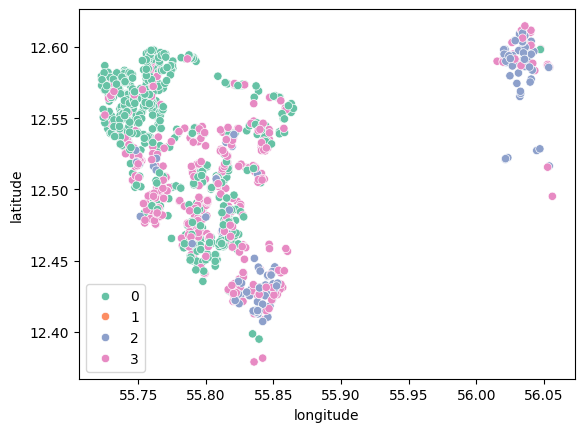

In [10]:
sns.scatterplot(data = X, x = 'longitude', y = 'latitude', hue = labels, palette="Set2");

This goes to show that unsupervised machine learning isnt quite relevant for our use case. We basically get the same map as we did in OLA2, displaying the northern part of Sjælland but flipped. Although we'll try with another example to gather more knowledge regarding unsupervised machine learning specifically using the KMeans algorithm.

In [14]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [17]:
# Loading the dataset
iris = load_iris()

df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df.columns = [col.strip(" (cm)") for col in df.columns]  # Stripping the " (cm)" from column names
df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Check notebook KModesExample to see our solution with another dataset exploring the KModes algorithm